In [18]:
import pandas as pandas
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dataset = pandas.read_csv('Downloads/ds_salaries.csv')
dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [14]:
missing_values = dataset.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [15]:
dataset.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [16]:
dataset['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [17]:
print("\nStatistical Summary:")
print(dataset.describe())


Statistical Summary:
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [19]:
# Select only numeric columns for the correlation matrix
numeric_corr = dataset.select_dtypes(include=[np.number])

# Compute the correlation matrix
print("\nCorrelation Matrix:")
print(numeric_corr.corr())


Correlation Matrix:
               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.094724       0.228290     -0.236430
salary         -0.094724  1.000000      -0.023676      0.028731
salary_in_usd   0.228290 -0.023676       1.000000     -0.064171
remote_ratio   -0.236430  0.028731      -0.064171      1.000000


/var/folders/gw/p4rv6sfn0fx4sk29djptzr_40000gp/T/ipykernel_17359/2299523107.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='salary_in_usd', y='job_title', data=salary_by_title, estimator=sum, ci=None)


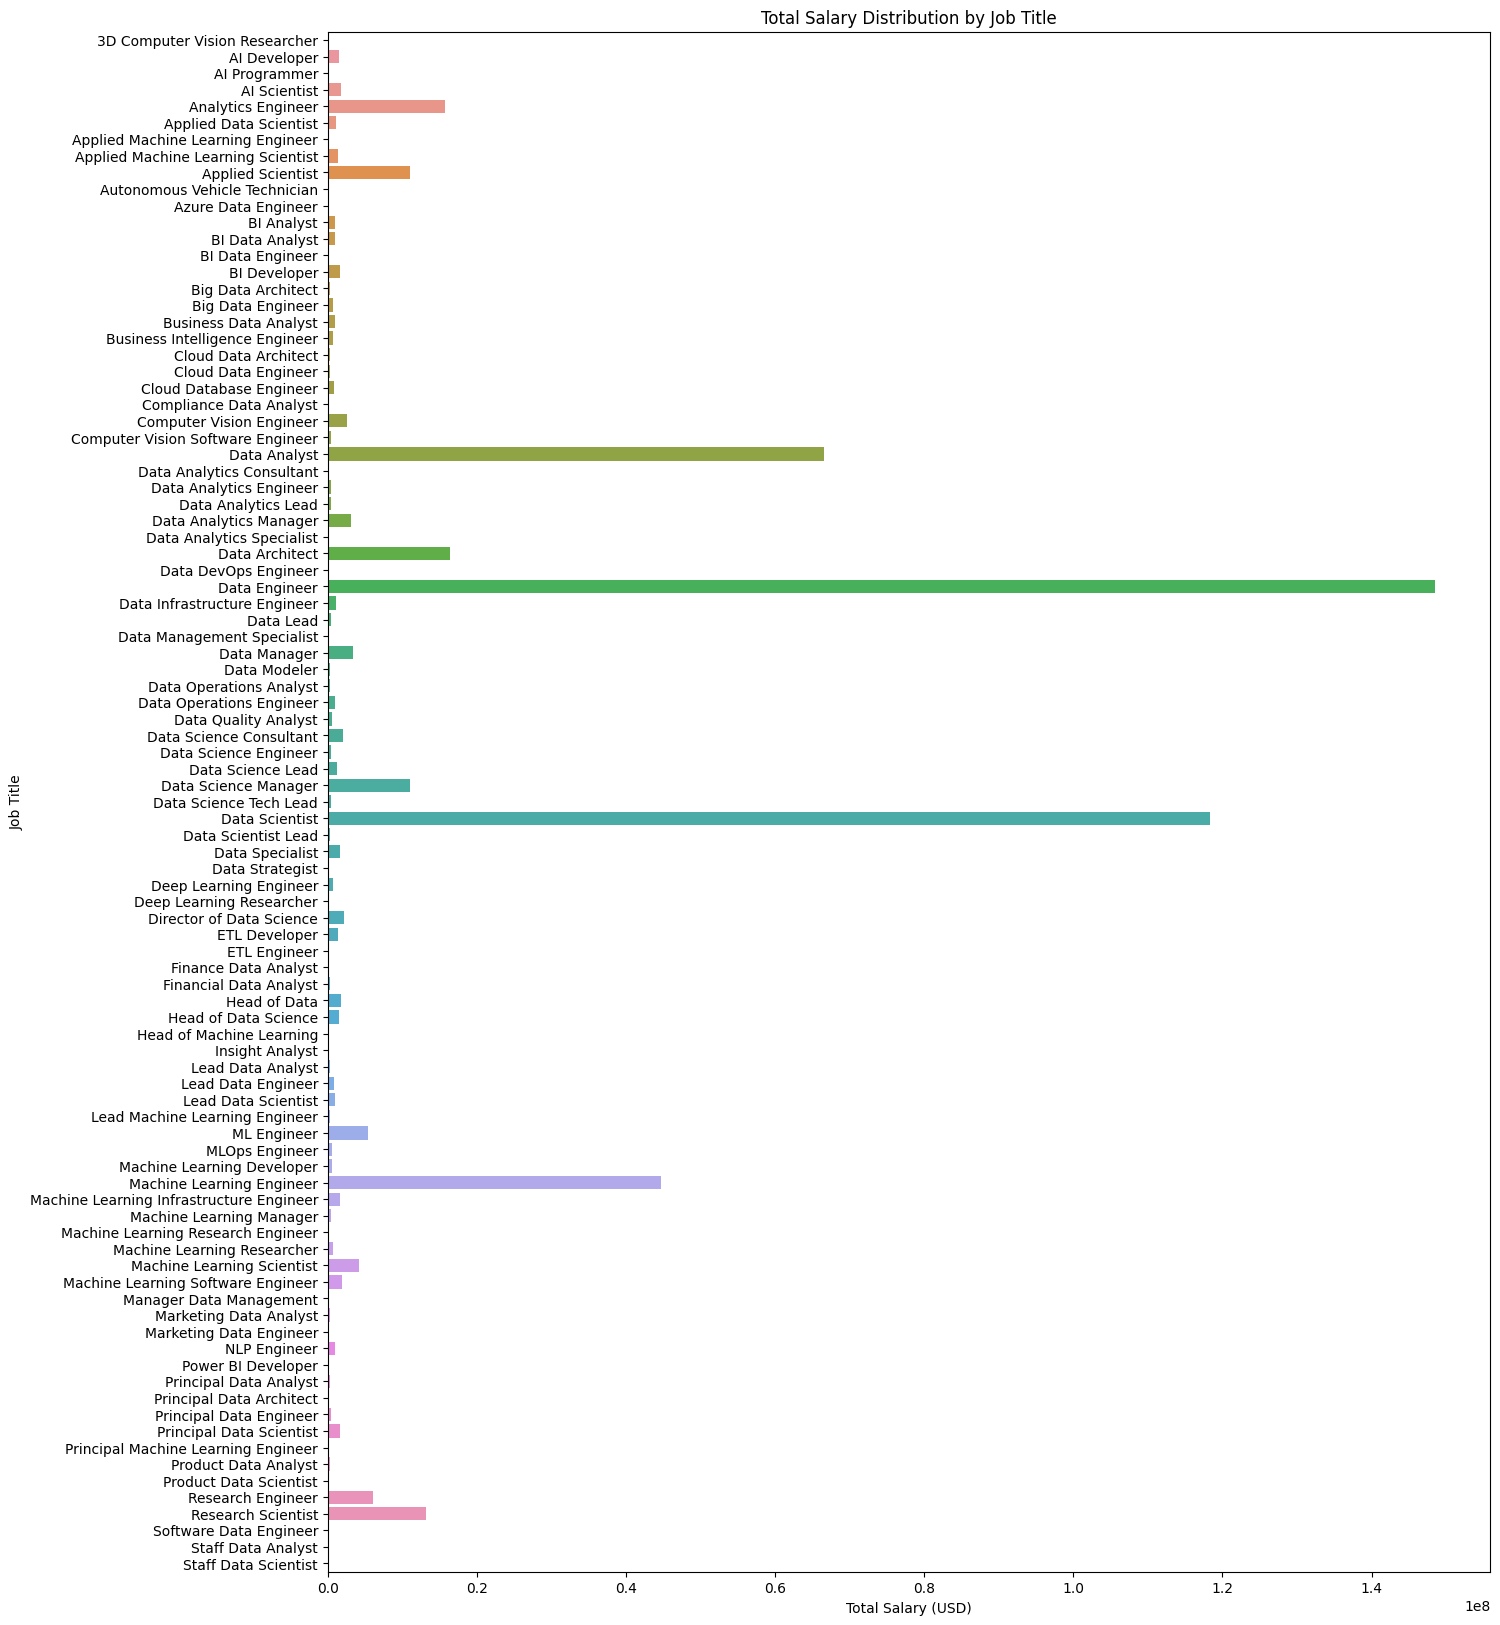

In [20]:
# Function to create a bar chart for salary distribution by job title
def plot_salary_distribution(data):
    plt.figure(figsize=(15, 20))
    salary_by_title = data.groupby('job_title')['salary_in_usd'].sum().reset_index()
    sns.barplot(x='salary_in_usd', y='job_title', data=salary_by_title, estimator=sum, ci=None)
    plt.title('Total Salary Distribution by Job Title')
    plt.xlabel('Total Salary (USD)')
    plt.ylabel('Job Title')
    plt.savefig('salary_distribution_bar_chart.png')
    plt.show()
plot_salary_distribution(dataset)

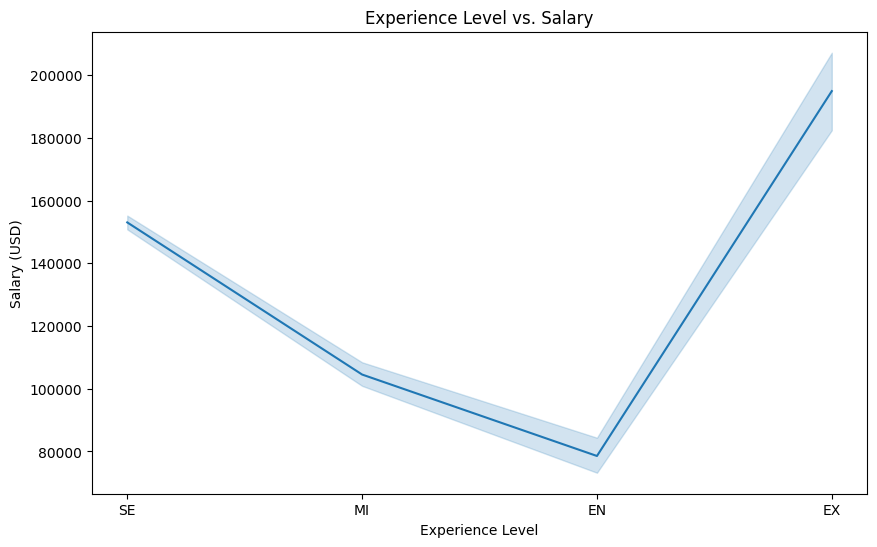

In [21]:
# Function to create a scatter plot for experience level vs. salary
def plot_experience_vs_salary(data):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='experience_level', y='salary_in_usd', data=data)
    plt.title('Experience Level vs. Salary')
    plt.xlabel('Experience Level')
    plt.ylabel('Salary (USD)')
    plt.savefig('experience_vs_salary_scatter_plot.png')
    plt.show()
plot_experience_vs_salary(dataset)

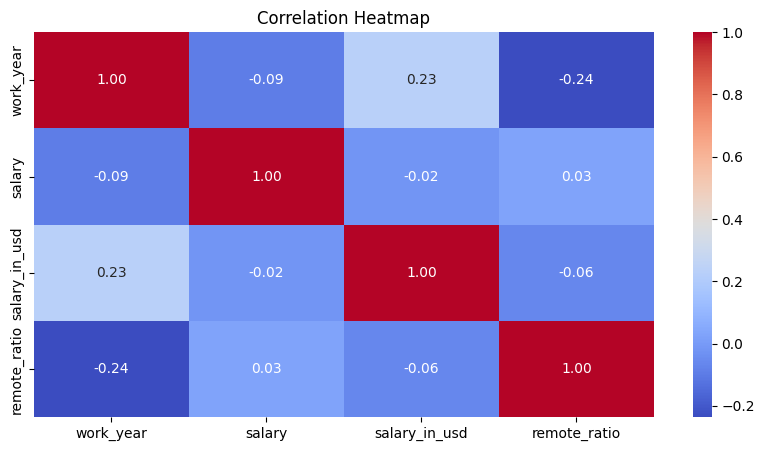

In [22]:
# Function to create a heatmap for the correlation matrix
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 5))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.savefig('correlation_heatmap.png')
    plt.show()
plot_correlation_heatmap(dataset)